# HM 2 CODING
# 4 Coding for SVM 

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 4.1 Data generating and plotting

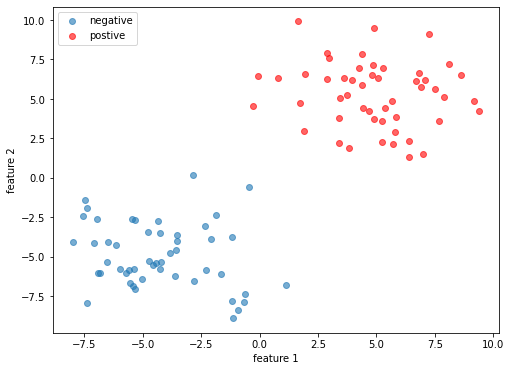

In [212]:
mu_neg = np.array([-5, -5])
sigma_neg = 5 * np.identity(2)
mu_pos = np.array([5, 5])
sigma_pos = 5 * np.identity(2)

# neg_1, neg_2 = np.random.multivariate_normal(mu_neg, sigma_neg, 50).T
# pos_1, pos_2 = np.random.multivariate_normal(mu_neg, sigma_pos, 50).T

neg = np.random.multivariate_normal(mu_neg, sigma_neg, 50).T
pos = np.random.multivariate_normal(mu_pos, sigma_pos, 50).T

neg_label = -1 * np.ones(50)
pos_label = np.ones(50)

# scatter plot
fig, ax = plt.subplots(figsize=(8,6))
# ax.subplots(figsize=(8,6))
ax.scatter(neg[0], neg[1], alpha=0.6)
ax.scatter(pos[0], pos[1], alpha=0.6, c='r')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.legend(['negative', 'postive']);

## 4.2 Draw decision boudary

In [213]:
from sklearn.svm import SVC

In [1]:
def plotClassifier(model, X, y):
    """plots the decision boundary of the model and the scatterpoints
       of the target values 'y'.

    Assumptions
    -----------
    y : it should contain two classes: '1' and '2'

    Parameters
    ----------
    model : the trained model which has the predict function

    X : the N by D feature array

    y : the N element vector corresponding to the target values

    """
    x1 = X[:, 0]
    x2 = X[:, 1]

    x1_min, x1_max = int(x1.min()) - 1, int(x1.max()) + 1
    x2_min, x2_max = int(x2.min()) - 1, int(x2.max()) + 1

    x1_line =  np.linspace(x1_min, x1_max, 200)
    x2_line =  np.linspace(x2_min, x2_max, 200)

    x1_mesh, x2_mesh = np.meshgrid(x1_line, x2_line)

    mesh_data = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]

    y_pred = model.predict(mesh_data)
    y_pred = np.reshape(y_pred, x1_mesh.shape)

    plt.figure()
    plt.xlim([x1_mesh.min(), x1_mesh.max()])
    plt.ylim([x2_mesh.min(), x2_mesh.max()])

    plt.contourf(x1_mesh, x2_mesh, -y_pred.astype(int), # unsigned int causes problems with negative sign... o_O
                cmap=plt.cm.RdBu, alpha=0.6)


    y_vals = np.unique(y)
    plt.scatter(x1[y==y_vals[0]], x2[y==y_vals[0]], color="b", label="class %+d" % y_vals[0])
    plt.scatter(x1[y==y_vals[1]], x2[y==y_vals[1]], color="r", label="class %+d" % y_vals[1])
    plt.legend()

In [214]:
# concate data
feature1 = np.concatenate((neg[0], pos[0]))
feature2 = np.concatenate((neg[1], pos[1]))
label = np.concatenate((neg_label, pos_label))

X = {
    'feature1': feature1,
    'feature2': feature2
}
# X_train and y_train
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(label)

df_all = pd.merge(left=df_X, right=df_y, left_index=True, right_index=True)
df_all.columns=['feature1','feature2','label']

In [215]:
# fit the svc model
svc_clf = SVC(kernel='linear', C=1)
svc_clf.fit(df_X, df_y)
# svc_clf.support_vectors_

SVC(C=1, kernel='linear')

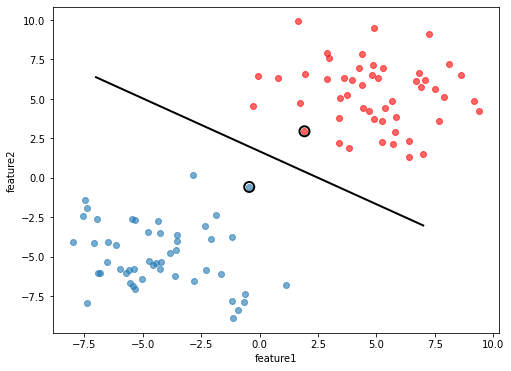

In [238]:
# plot the decision function

# get the coefficients and intercept of decision boundary
w = svc_clf.coef_[0]
b = svc_clf.intercept_[0]

x0 = np.linspace(-7, 7) # x 
decision_boundary = (- w[0] * x0 - b) / w[1]  # line


plt.figure(figsize=(8,6))
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.scatter(neg[0], neg[1], alpha=0.6)
plt.scatter(pos[0], pos[1], alpha=0.6, c='r')


# plot support vectors
svs = svc_clf.support_vectors_
plt.scatter(svs[:,0],svs[:,1],s=100,linewidth=2,
                        facecolors='none',edgecolors='k');
plt.xlabel('feature1')
plt.ylabel('feature2');
# plt.grid(True)

## 4.3 

In [217]:
def TrainPlotDecisionBoundary(Cs, x0, X_train, y_train, 
                              draw_support_vectors, draw_C_svs):
    """"""""""
    A function to plot decision boudaries of SVM. 
    """"""""""
    
    ws = []  # store coefs
    bs = []  #store intercepts
    svs_list = []
    n_of_svs = []
    # for each C, train model

    for c in Cs:
        svc_clf = SVC(kernel='linear', C=c)
        svc_clf.fit(X_train, y_train)
        # get the coefficients and intercept of decision boundary
        w = svc_clf.coef_[0]
#         ws.append(w)
        b = svc_clf.intercept_[0]
#         bs.append(b)
        svs = svc_clf.support_vectors_
#         svs_list.append(svs)
        n_svs = len(svs)
        n_of_svs.append(n_svs)
        fig1, ax1 = plt.subplots(figsize=(8,6))
        decision_boundary = (- w[0] * x0 - b) / w[1]  # line
        ax1.plot(x0, decision_boundary, "k-", linewidth=1)
        plt.scatter(X_train.iloc[:50,0], X_train.iloc[:50,1], alpha=0.6)
        plt.scatter(X_train.iloc[51:,0], X_train.iloc[51:,1], alpha=0.6, c='r')
    
        if draw_support_vectors == True:
#     plt.figure(figsize=(8,6))
#         for w,b in zip(ws, bs):
            # draw vector machines
            plt.scatter(svs[:,0],svs[:,1],s=100,linewidth=2,
                        facecolors='none',edgecolors='k');
            plt.xlabel('feature1')
            plt.ylabel('feature2');
            plt.title('number of support vector machines vs. C')

    if draw_C_svs == True:
        fig2, ax2 = plt.subplots(figsize=(8,6))
        ax2.plot(np.log(Cs), n_of_svs)
        plt.xlabel('C')
        plt.ylabel('number of support vectors')


    

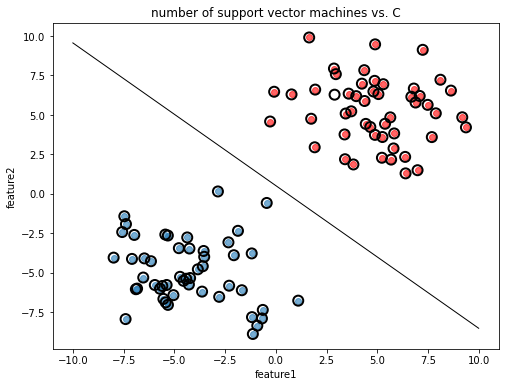

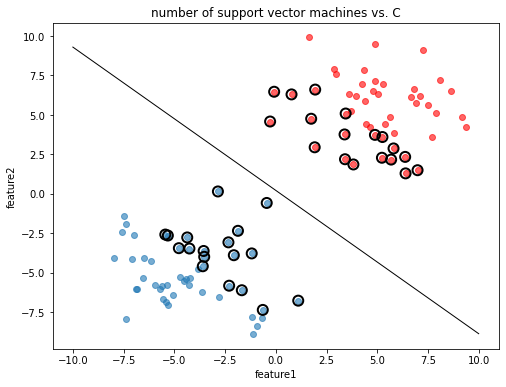

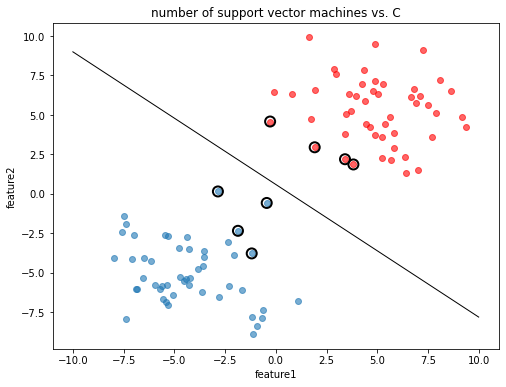

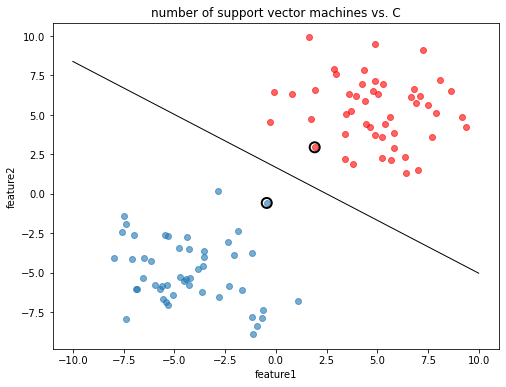

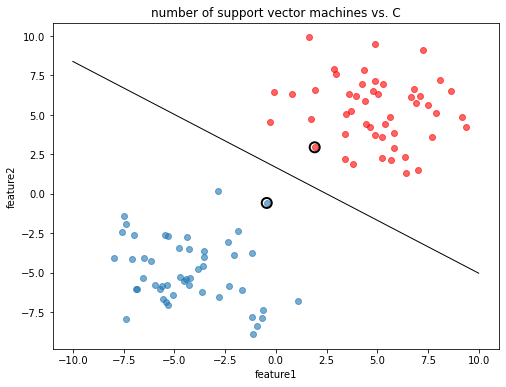

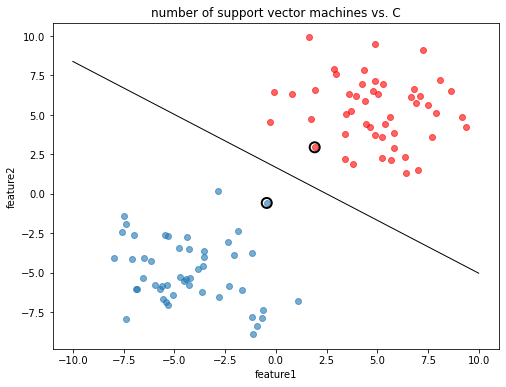

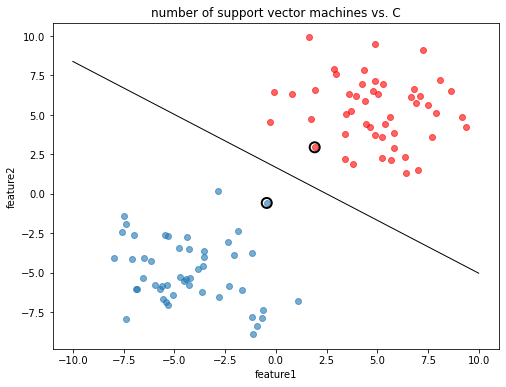

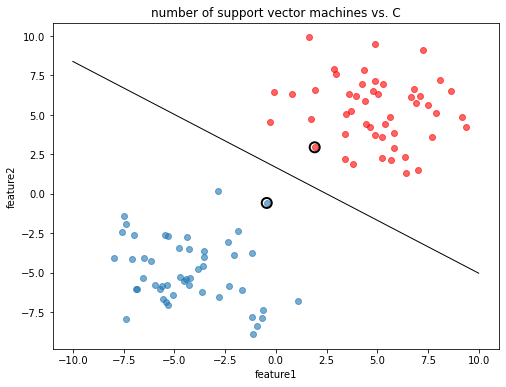

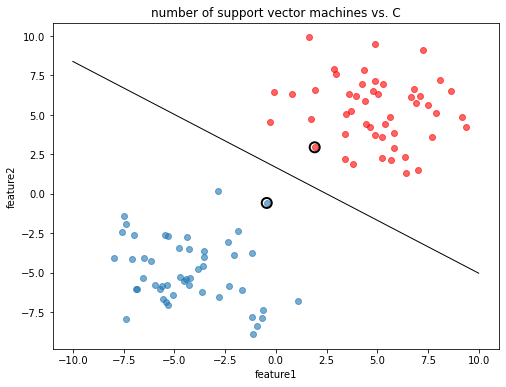

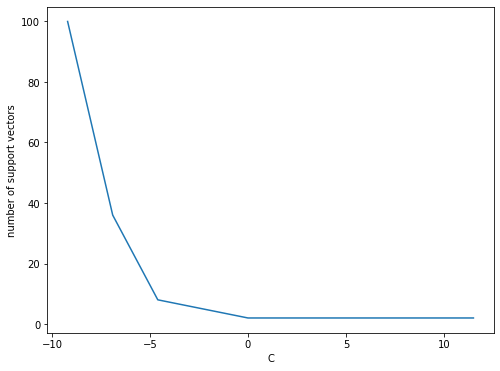

In [218]:
Cs = [0.0001, 0.001, 0.01, 1, 50, 100, 500, 1000, 100000]
X_train = df_X
y_train = df_y
x0 = np.linspace(-10,10)

TrainPlotDecisionBoundary(Cs,x0,  X_train, y_train, 
                              draw_support_vectors=True, draw_C_svs=True)

The number of support vectors decreases as C increases. 

Because C identifies the penalty of misclassification. The higher C is, the larger the penalty will be. Thus, when C is relatively higher, the model will reduce the number of the violations so the margin is narrower, so there are fewer support vectors. When C is smaller, the penalty reduces, and margin is wider which allows more support vectors.

## 4.4 Rescale data

In [241]:
# from sklearn.preprocessing import MinMaxScaler

X_train = df_X
y_train = df_y
f1 = X_train.iloc[:, 0]
f2 = X_train.iloc[:, 1]
# min_max_scaler = MinMaxScaler()
min_f1 = min(f1)
max_f1 = max(f1)
min_f2 = min(f2)
max_f2 = max(f2)

f1_scaled = (f1 - min_f1) / (max_f1 - min_f1)
f2_scaled = (f2 - min_f2) / (max_f2 - min_f2)

scaled = {}
scaled['f1_scaled'] = f1_scaled
scaled['f2_scaled'] = f2_scaled
X_train_scaled = pd.DataFrame(scaled)

# X_train_scaled

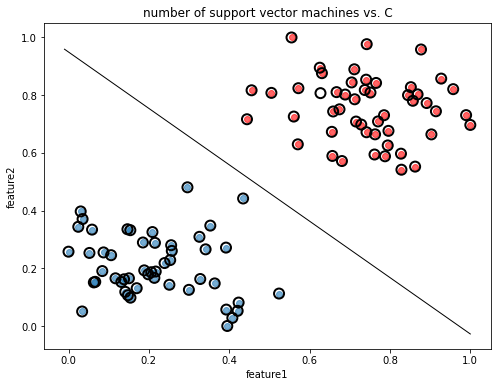

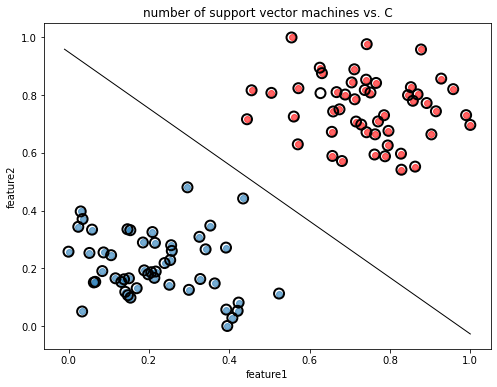

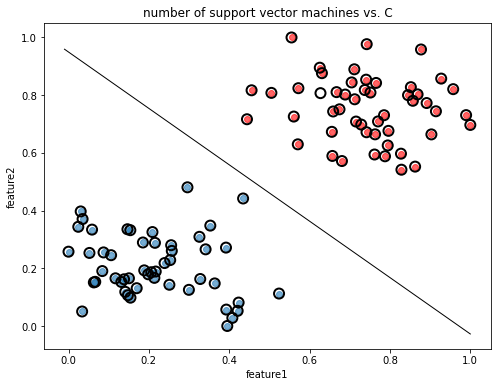

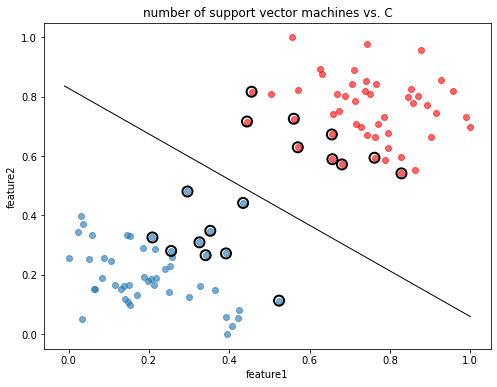

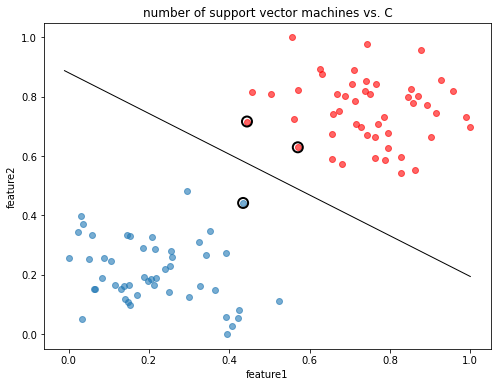

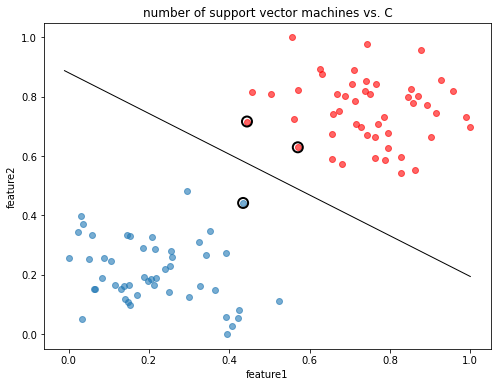

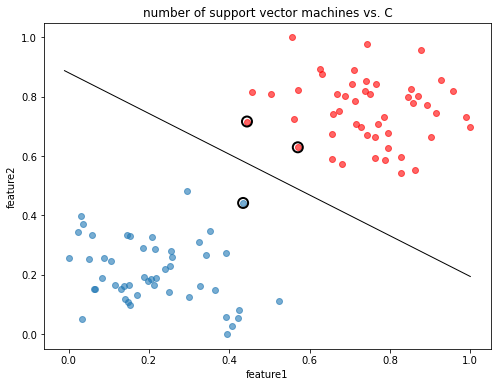

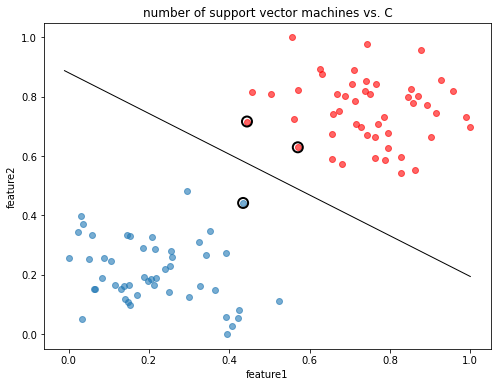

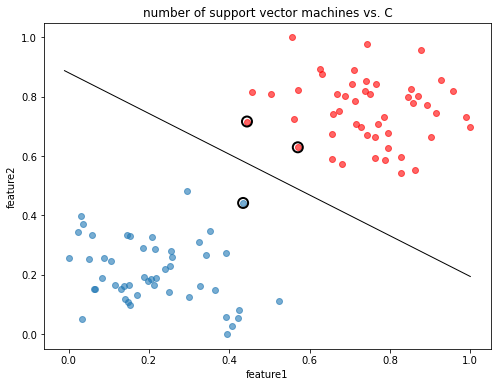

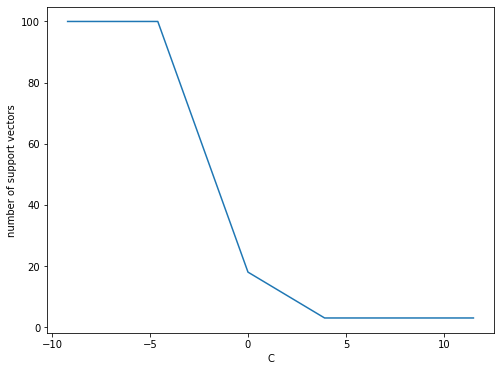

In [242]:
Cs = [0.0001, 0.001, 0.01, 1, 50, 100, 500, 1000, 100000]
# X_train = X_train_scaled
# y_train = df_y
x0 = np.linspace(-0.01,1)
TrainPlotDecisionBoundary(Cs, x0, X_train_scaled, df_y, 
                              draw_support_vectors=True, draw_C_svs=True)

Yes, they are different from the previous question.

The geometric margin decreases while the effect of each feature on the predictions increases.


## 4.5 boosted decsion trees

In [233]:
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.inspection import DecisionBoundaryDisplay

gb_clf = GradientBoostingClassifier().fit(X_train, y_train)
gb_clf_rescaled = GradientBoostingClassifier().fit(X_train_scaled, y_train)
# disp = DecisionBoundaryDisplay.from_estimator(
#      gb_clf, X_train, response_method="predict",
#      xlabel=X_train.columns[:-1], ylabel=y_train.columns[-1],
#      alpha=0.5)

<AxesSubplot:>

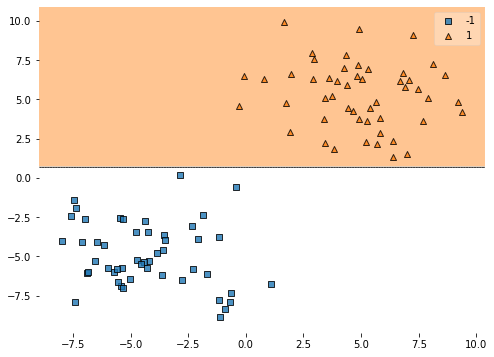

In [240]:
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions

fig = plt.subplots(figsize=(8,6))
plot_decision_regions(np.array(X_train), label.astype(int), gb_clf)
# plot_decision_regions(np.array(X_train_scaled), label.astype(int), gb_clf_rescaled)

<AxesSubplot:>

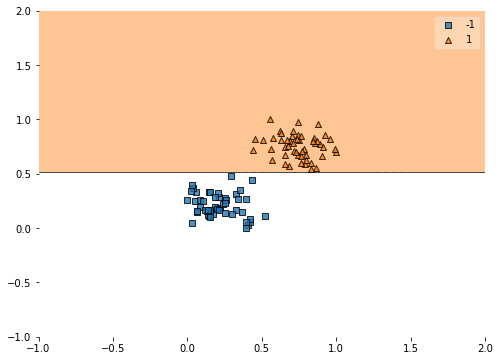

In [237]:
fig = plt.subplots(figsize=(8,6))
plot_decision_regions(np.array(X_train_scaled), label.astype(int), gb_clf_rescaled)

The plots and decision boundaries do not change after rescaling the data when using tree model. That is consistent with my expectation.

# 5 Coding for Logistic Regression

In [147]:
import csv
import math
from sklearn.model_selection import train_test_split

## 5.2 Preprocessing

In [129]:
# word dictionary
word_dict = {}
with open('dict.txt') as file:
    
    for line in file:
        (word, index) = line.strip().split(' ')
        index_int = int(index)
        word_dict[index_int] = str(word)
        
n_words = len(word_dict)

In [126]:

def GetKey(dictionary, target):
    """""
    get the key of certain value query
    """""
    for key, value in dictionary.items():
        if value == target:
            
            return key

# review_dict = {}   
label_dict = {}  # store labels of the reviews
review_dict = {}   # store the reviews like
                    # { 0: {23:1, 24:1, 25:1, ...}
                    #  1: {13:1, 14:1, 15:1, ...}
                    #  ...
                    #  n: {34:1, 36:1, ....} }  
                # these inner dicts might have different lengths
                # because each review has different number of words
                    
# open .tsv file
with open('moviereview.tsv') as file:
    
    tsv_file = csv.reader(file, delimiter="\t")
    file_list = list(tsv_file)
    for i in range(len(file_list)):    # get the index of each line
        label = file_list[i][0]
        review = file_list[i][1]
        label_int = int(label)  # convert string to int
        label_dict[i] = label_int    # store labels   
        
        sentence_dict = {}  # for each line of review, 
                            # create a dict to store the Booleans 
                            # if the word appears in dictionary: 
                                # set to 1
                            # else: ignore
        for word in review.split(' '):
            if word in word_dict.values():
                word_idx = GetKey(word_dict, word)
                sentence_dict[word_idx] = 1
                
        review_dict[i] = sentence_dict
        
        
len(review_dict[5])
len(review_dict[10])
        

493

In [160]:
# split data
# X_train5, y_train5, X_test5, y_test5 = train_test_split(review_dict, label_dict, 
#                                                         test_size=0.20, random_state=10)
def dict_slice(dict_, start, end):
    """"
    a function to divide the dictionary 
    into expected slices
    """""
    keys = dict_.keys()
    dict_slice = {}
    for k in list(keys)[start:end]:
        dict_slice[k] = dict_[k]
    return dict_slice

# split train set and test set
X_train5 = dict_slice(review_dict, 0, round(0.8*len(review_dict)))
X_test5 = dict_slice(review_dict, round(0.8*len(review_dict)), len(review_dict))
y_train5 = dict_slice(label_dict, 0, round(0.8*len(label_dict)))
y_test5 = dict_slice(label_dict, round(0.8*len(label_dict)), len(label_dict))

In [161]:
# initialization
T = 30
eta = 0.1
theta = [0] * n_words
bias = 0
n_lines = len(X_train5)  # total number of reviews in the training set
n_words = len(word_dict)  # toal number of words in the dictionary
# 30 epochs
for t in range(T):
    grad_vector = [0] * n_lines  #initialize gradient vector
    for i in range(n_lines):   # interate each row of reviews
        sum1 = bias   
        for index in X_train5[i]:   # for each line, iterate each word index
            sum1 += theta[index]   # sum out theta with corresponding index
                                    # this is a faster way to calculate dot product
        y_label = y_train5[i] # get the label for each review
        grad_vector[i] = y_label - 1 / (1 + math.exp(-sum1))   # calculate loss

# print(grad_vector)
    
    theta_sum = [0] * n_words  
    bias_sum = 0
    for i in range(n_lines):
        for index in X_train5[i]:
            theta_sum[index] += grad_vector[i]
        bias_sum += grad_vector[i]
        
    for index in range(n_words):
        theta[index] += eta * theta_sum[index] / n_lines
        
    bias += eta * bias_sum / n_lines
    


In [169]:
# run test set

best_theta = theta
sup_script = 0
pred_labels = []
for key, reviews in X_test5.items():
    for idx, values in reviews.items():
        sup_script += best_theta[idx]
        
    P_pos = 1 / (1 + math.exp(sup_script))
    if P_pos > 0.5:
        pred_labels.append(1)
        
    else:
        pred_labels.append(0)
        

def Accuracy(true_label, predict_label):
    """""
    a function to calculate prediction accuracy
    """""
    
    correct = 0
    incorrect = 0
    for i,j in zip(true_label, predict_label):
        if i == j:
            correct += 1
            
        elif i != j:
            incorrect += 1
            
    accuracy_rate = correct / len(predict_label)
            
    return accuracy_rate


Accuracy(y_test5.values(), pred_labels)

0.9208333333333333

# 6 Boosted Decision Trees and Random Forest
## 6.1 Preprocessing

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV


In [46]:
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [47]:
# drop NaN columns
df_ti = titanic.dropna(axis='columns')
df_ti.shape
df_ti1 = df_ti.copy()

(891, 6)

In [50]:
# encoding sex

def SexEncoder(df):
    
    if df['Sex'] == 'male':
        return 0
    elif df['Sex'] == 'female':
        return 1
    
df_encoded = pd.DataFrame(df_ti.apply(SexEncoder, axis=1), columns=['Sex_encoding'])
df_ti_encoded = pd.merge(left=df_ti, right=df_encoded, left_index=True, right_index=True)
df_ti_encoded1 = df_ti_encoded.drop(columns='Sex')

In [51]:
# split training set and test set

# split X and y
X = df_ti_encoded1.drop(columns='Survived')
y = df_ti_encoded1['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

## 6.2 Fit models and estimate training time

In [52]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
%time

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


In [53]:
Ada_clf = AdaBoostClassifier()
Ada_clf.fit(X_train, y_train)
%time

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


Adaboost required less time to train.  

Because Adaboost and boosted tree models constraints the dpeth of trees and number of leaves so that they train faster, while random forest has not restrictions on this parameters. 

Adaboost default parameters:  
1. n_estimator (default=50)(The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.). 
1. Learning rate (default=1)(Weight applied to each classifier at each boosting iteration.)  
3. ...

Random Forest default parameters:   
1. n_estimators (default=100)
2. max_depth=None
3. ...


## 6.3 Tuning and plotting

In [54]:
# parameters
params_rf = {
    'criterion': ['gini','entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 4, 8, 12, 16],
    'min_samples_leaf': [1, 5, 10]
}

params_ab = {
    'n_estimators': [5, 10, 20, 30, 50, 75, 100],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1]
}
    
scores={}
# hyperparameter tuning
rf_search = GridSearchCV(RF_clf, params_rf, cv=5, scoring='accuracy')
ab_search = GridSearchCV(Ada_clf, params_ab, cv=5, scoring='accuracy')

rf_search.fit(X_train, y_train)
ab_search.fit(X_train, y_train)


rf_best_param = rf_search.best_params_
ab_best_param = ab_search.best_params_
rf_best_score = rf_search.best_score_
ab_best_score = ab_search.best_score_

print(f'Best parameters for RandomForest: {rf_best_param}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{rf_best_score:.3f}'
)
scores['RandomForest'] = rf_best_score
print('-----')

print(f'Best parameters for AdaBoost: {ab_best_param}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{ab_best_score:.3f}'
)
scores['AdaBoost'] = ab_best_score

Best parameters for RandomForest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mean cross-validated accuracy score of the best_estimator: 0.813
-----
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 75}
Mean cross-validated accuracy score of the best_estimator: 0.806


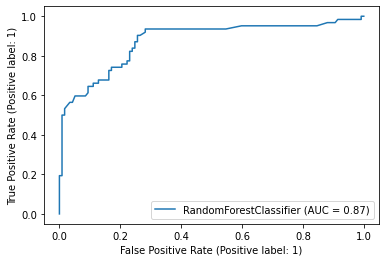

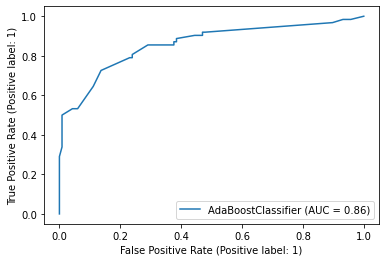

In [55]:
# use the best model to predict and plot ROC and compute AUC
# RandomForest
rf_best_model = RandomForestClassifier(criterion = 'entropy', 
                                       max_depth = 15, 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 16)
rf_best_model.fit(X_train, y_train)
plot_roc_curve(rf_best_model, X_test, y_test);

# Adaboost
ab_best_model = AdaBoostClassifier(learning_rate = 0.1,
                                  n_estimators = 75)
ab_best_model.fit(X_train, y_train)
plot_roc_curve(ab_best_model, X_test, y_test);


The ROC curves of two models looks very similar. And AUC score is also roughly the same.

Differences:

Random Forest use boostrap method to generate many trees with different splitting criterions, and use voting to finalize the tree model. While Adaboost combines several weak classifiers into one classifier, which would generalize better.

In this problem, the prediction result of two models are similar because the data is balanced and has resonable size. However, if sample size is small and noisy, random forest can leads to overfitting.

# 7 Generalized Additive Models